In [22]:
import tensorflow as tf
from tensorflow.keras import layers, models

In [25]:
# 1. Load dataset
dataset_path = r'C:\Users\pamel\OneDrive\Documentos\GitHub\KI_project\dataset\extracted'

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    dataset_path,
    validation_split=0.2,
    subset='training',
    seed=123,
    image_size=(128, 128),
    batch_size=32
)

test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    dataset_path,
    validation_split=0.2,
    subset='validation',
    seed=123,
    image_size=(128, 128),
    batch_size=32
)

print(f"Training samples: {len(train_ds)}, Test samples: {len(test_ds)}")

Found 6136 files belonging to 2 classes.
Using 4909 files for training.
Found 6136 files belonging to 2 classes.
Using 1227 files for validation.
Training samples: 154, Test samples: 39


Data visualization



Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [2.5195312..255.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..246.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..217.25].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..229.75].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..254.89844].
Clipping input data to the valid range for imshow 

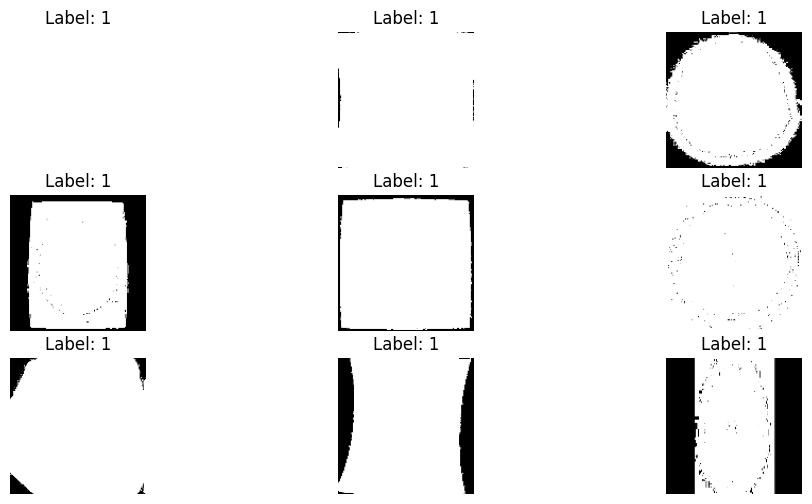

In [12]:
train_ds_list = list(train_ds)
sample_image, label = train_ds_list[sample_idx]

import random
import matplotlib.pyplot as plt
from PIL import Image

# Convert dataset to list for easy indexing
train_ds_list = list(train_ds)

# Select 9 random samples
sample_indices = random.sample(range(len(train_ds_list)), 9)

plt.figure(figsize=(12, 6))

for i, sample_idx in enumerate(sample_indices):
    # Get batch
    batch_images, batch_labels = train_ds_list[sample_idx]
    # Take first image from batch
    img = batch_images[0].numpy()
    label = batch_labels[0].numpy()

    plt.subplot(3, 3, i + 1)
    plt.imshow(img)
    plt.title(f"Label: {label}")
    plt.axis('off')

plt.show()

In [17]:
import os

base_dir = r'C:\Users\pamel\OneDrive\Documentos\GitHub\KI_project\dataset\extracted'

def get_class_counts(split):
    split_dir = os.path.join(base_dir, split)
    class_counts = {}
    for cls in os.listdir(split_dir):
        cls_path = os.path.join(split_dir, cls)
        if os.path.isdir(cls_path):
            class_counts[cls] = len(os.listdir(cls_path))
    return class_counts

# Training counts
train_counts = get_class_counts("Training")

# Testing counts
test_counts = get_class_counts("Testing")

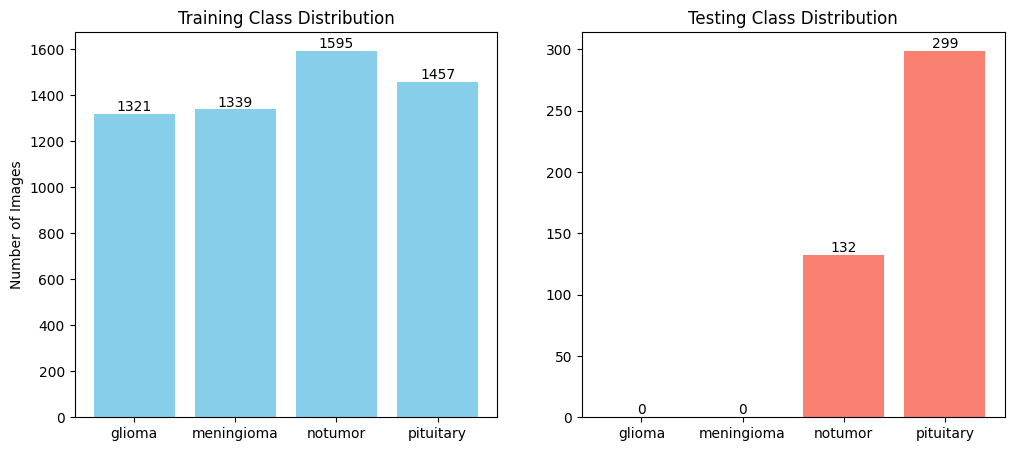

In [19]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Training plot
bars1 = axes[0].bar(train_counts.keys(), train_counts.values(), color="skyblue")
axes[0].set_title("Training Class Distribution")
axes[0].set_ylabel("Number of Images")
axes[0].bar_label(bars1)   

# Testing plot
bars2 = axes[1].bar(test_counts.keys(), test_counts.values(), color="salmon")
axes[1].set_title("Testing Class Distribution")
axes[1].bar_label(bars2)   

plt.show()